# Plot: samples/sec vs. memory use
- `alb data-loader` appends rows to [epochs.parquet](./epochs.parquet)
- `alb data-loader-nb` executes this notebook on a given slice of that data

In [1]:
import utz
from utz import *
from utz.plots import symbols
from benchmarks.cli.data_loader import DEFAULT_PQT_PATH, CHUNK_METHODS
from benchmarks.cli.data_loader_nb import DEFAULT_MARKER_SIZE_ANCHOR

[Papermill](https://papermill.readthedocs.io/en/latest/) parameters:

In [2]:
db_path = DEFAULT_PQT_PATH  # Parquet path to read epoch stats from
out_dir = None              # Directory to save plot PNG/JSON to (e.g. "m3", "azl")
host = None                 # Description of host the stats were collected on, used in plot subtitle (e.g. "M3 Mac", "Amazon Linux")
show = "html"               # Set to "png" to render plots in notebook as PNGs (good for noninteractive mode / Git-committing)
hostname_rgx = None         # Filter DB "hostname" field to values matching this regex
max_batches = None          # Filter DB `max_batches` column
since = None                # Filter DB to `alb_start` since this datetime
instance_type = None        # Filter to runs on this EC2 instance type
sorted_datasets = None      # Filter DB based on `sorted_datasets`
legend_orientation = None   # Orient legends vertically ("v") or horizontally ("h")
marker_opacity = 0.8        # Marker opacity
marker_size_anchor = None   # Scale marker sizes such that their areas are proportional to `block_size`, above and below this "anchor" value
uri_rgx = None              # Filter DB "uri" field to values matching this regex
start_idx = None            # Filter DB to runs consuming dataset slices beginning at this index
end_idx = 123               # Filter DB to runs consuming dataset slices ending at this index
W = 1000                    # Output plot width
H =  600                    # Output plot height

In [3]:
# Parameters
db_path = "/Users/ryan/c/tiledb/arrayloader-benchmarks/notebooks/data-loader/epochs.parquet"
marker_size_anchor = None
hostname_rgx = None
instance_type = None
out_dir = "/Users/ryan/c/tiledb/arrayloader-benchmarks/notebooks/data-loader/:138_2048"
show = "png"
max_batches = 2048
since = None
sorted_datasets = False
start_idx = 0
end_idx = 138
uri_rgx = None


In [4]:
if marker_size_anchor is None:
    marker_size_anchor = DEFAULT_MARKER_SIZE_ANCHOR

In [5]:
df = pd.read_parquet(db_path)
if hostname_rgx:
    df = df[df.hostname.str.contains(hostname_rgx)].reset_index(drop=True).copy()
if since:
    since = to_dt(since)
    df = df[df.alb_start >= since].reset_index(drop=True).copy()
if instance_type:
    df = df[df.instance_type == instance_type].copy()
if uri_rgx:
    df = df[~df.uri.isna()]
    df = df[df.uri.str.contains(uri_rgx)].reset_index(drop=True).copy()
if start_idx is not None:
    df = df[df.start_idx == start_idx].reset_index(drop=True).copy()
if end_idx is not None:
    df = df[df.end_idx == end_idx].reset_index(drop=True).copy()
if max_batches is not None:
    df = df[df.max_batches == max_batches].copy()
if sorted_datasets is not None:
    df = df[df.sorted_datasets == sorted_datasets].copy()
df

,start_dt,epoch,n_rows,n_cols,elapsed,gc,max_mem,alb_start_dt,sha,user,hostname,uri,chunk_method,batch_size,chunk_size,chunks_per_block,py_buffer_size,soma_buffer_size,block_size,instance_id,instance_type,sorted_datasets,host,collection_id,census_uri,census_version,start_idx,end_idx,max_batches,total_rows,end_dt
218,2024-06-22 11:23:08.753121,0,2097152,20000,379.369499,40.059773,20285542400,2024-06-22 11:23:08.040629,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,np.array,1024,131072,1,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 11:29:43.977897
219,2024-06-22 11:29:50.887164,0,2097152,20000,932.770735,41.176551,28914135040,2024-06-22 11:29:50.134094,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,scipy.csr,1024,131072,1,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 11:46:22.676869
220,2024-06-22 11:46:29.121132,0,2097152,20000,378.265712,40.263199,21673172992,2024-06-22 11:46:28.428439,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,np.array,1024,65536,2,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 11:53:12.731751
221,2024-06-22 11:53:19.307568,0,2097152,20000,1065.742548,41.925356,26026782720,2024-06-22 11:53:18.702331,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,scipy.csr,1024,65536,2,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 12:12:13.966125
222,2024-06-22 12:12:20.738343,0,2097152,20000,410.447102,40.189817,28336775168,2024-06-22 12:12:20.060996,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,np.array,1024,32768,4,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 12:19:34.556932
223,2024-06-22 12:19:40.762135,0,2097152,20000,1007.467575,43.661673,28728041472,2024-06-22 12:19:40.137098,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,scipy.csr,1024,32768,4,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 12:37:45.746077
224,2024-06-22 12:37:52.470591,0,2097152,20000,395.410244,39.596777,28958818304,2024-06-22 12:37:51.861786,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,np.array,1024,16384,8,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 12:44:53.296192
225,2024-06-22 12:44:59.578075,0,2097152,20000,1023.428973,41.594171,28193873920,2024-06-22 12:44:58.894168,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,scipy.csr,1024,16384,8,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 13:03:05.634839
226,2024-06-22 13:03:11.956948,0,2097152,20000,372.076847,39.269772,25887293440,2024-06-22 13:03:11.265656,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,np.array,1024,8192,16,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 13:09:51.340513
227,2024-06-22 13:09:57.551308,0,2097152,20000,1021.105282,46.982156,22593175552,2024-

In [6]:
hist = df[['uri', 'chunk_method', 'chunks_per_block', 'chunk_size']].value_counts().sort_index().rename('num')
hist

Series([], Name: num, dtype: int64)

In [7]:
pivoted = hist.reset_index(level=[0,1]).pivot(columns=['uri', 'chunk_method'], values='num')
# assert (pivoted == 5).all().all()
pivoted

chunks_per_block,chunk_size


In [8]:
df['chunk_lg2'] = df.chunk_size.apply(log2)
chunk_lg2_vals = df.chunk_lg2.apply(int).unique().tolist()
chunk_lg2_vals.sort()
min_chunk_log2, max_chunk_log2 = min(chunk_lg2_vals), max(chunk_lg2_vals)
min_chunk_log2, max_chunk_log2, chunk_lg2_vals

(4, 18, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [9]:
df['block_chunks_lg2'] = df.chunks_per_block.apply(log2).apply(int)
counts_lg2_vals = df.block_chunks_lg2.unique().tolist()
counts_lg2_vals.sort()
min_block_chunks_lg2, max_block_chunks_lg2 = min(counts_lg2_vals), max(counts_lg2_vals)
min_block_chunks_lg2, max_block_chunks_lg2, counts_lg2_vals

(0, 12, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [10]:
def fmt_td(e):
    s = int(e)
    h = s // 3600
    m = s // 60 % 60
    s = s % 60
    rv = ''
    if h:
        rv += f'{h}h'
    if h or m:
        rv += f'{m}m'
    if s:
        rv += f'{s}s'
    return rv

df['elapsed_str'] = df.elapsed.apply(fmt_td)
df['start_dt_str'] = df.start_dt.dt.strftime('%Y-%m-%d %H:%M:%S')

In [11]:
chunk_count_to_size = (
    df
    [['chunk_size', 'chunks_per_block']]
    .value_counts()
    .sort_index()
    .index
    .to_frame()
    .reset_index(drop=True, level=0)
    .chunk_size
    .to_dict()
)
chunk_count_to_size

{4096: 64,
 2048: 128,
 1024: 256,
 512: 512,
 256: 1024,
 128: 2048,
 64: 4096,
 32: 8192,
 16: 16384,
 8: 32768,
 4: 65536,
 2: 131072,
 1: 262144}

In [12]:
C = 'SOMA chunk size'
N = 'Chunks per shuffle block'
S = 'Samples / sec'
df[C] = pd.Categorical(df.chunk_size.apply(lambda c: f'{c:,}'))
df[N] = pd.Categorical(df.chunks_per_block.apply(lambda c: f'{c:,}'))
chunk_sizes = df[C].unique()
chunks_per_blocks = df[N].unique()
df[S] = df.n_rows / df.elapsed
M = 'Max. memory usage'
df = df.rename(columns={ 'max_mem': M, 'chunk_method': 'Method', })
df

,start_dt,epoch,n_rows,n_cols,elapsed,gc,Max. memory usage,alb_start_dt,sha,user,hostname,uri,Method,batch_size,chunk_size,chunks_per_block,py_buffer_size,soma_buffer_size,block_size,instance_id,instance_type,sorted_datasets,host,collection_id,census_uri,census_version,start_idx,end_idx,max_batches,total_rows,end_dt,chunk_lg2,block_chunks_lg2,elapsed_str,start_dt_str,SOMA chunk size,Chunks per shuffle block,Samples / sec
218,2024-06-22 11:23:08.753121,0,2097152,20000,379.369499,40.059773,20285542400,2024-06-22 11:23:08.040629,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,np.array,1024,131072,1,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 11:29:43.977897,17.0,0,6m19s,2024-06-22 11:23:08,"131,072",1,5527.993169
219,2024-06-22 11:29:50.887164,0,2097152,20000,932.770735,41.176551,28914135040,2024-06-22 11:29:50.134094,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,scipy.csr,1024,131072,1,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 11:46:22.676869,17.0,0,15m32s,2024-06-22 11:29:50,"131,072",1,2248.303813
220,2024-06-22 11:46:29.121132,0,2097152,20000,378.265712,40.263199,21673172992,2024-06-22 11:46:28.428439,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,np.array,1024,65536,2,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 11:53:12.731751,16.0,1,6m18s,2024-06-22 11:46:29,"65,536",2,5544.123960
221,2024-06-22 11:53:19.307568,0,2097152,20000,1065.742548,41.925356,26026782720,2024-06-22 11:53:18.702331,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,scipy.csr,1024,65536,2,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 12:12:13.966125,16.0,1,17m45s,2024-06-22 11:53:19,"65,536",2,1967.784813
222,2024-06-22 12:12:20.738343,0,2097152,20000,410.447102,40.189817,28336775168,2024-06-22 12:12:20.060996,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,np.array,1024,32768,4,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 12:19:34.556932,15.0,2,6m50s,2024-06-22 12:12:20,"32,768",4,5109.433084
223,2024-06-22 12:19:40.762135,0,2097152,20000,1007.467575,43.661673,28728041472,2024-06-22 12:19:40.137098,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,scipy.csr,1024,32768,4,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 12:37:45.746077,15.0,2,16m47s,2024-06-22 12:19:40,"32,768",4,2081.607440
224,2024-06-22 12:37:52.470591,0,2097152,20000,395.410244,39.596777,28958818304,2024-06-22 12:37:51.861786,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,np.array,1024,16384,8,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024-06-22 12:44:53.296192,14.0,3,6m35s,2024-06-22 12:37:52,"16,384",8,5303.737155
225,2024-06-22 12:44:59.578075,0,2097152,20000,1023.428973,41.594171,28193873920,2024-06-22 12:44:58.894168,d7fbe316db6677c82764962f084a99bcabac7fd2,ec2-user,ip-172-31-0-157.us-west-2.compute.internal,None,scipy.csr,1024,16384,8,1073741824,1073741824,131072,i-0deeddd9940b675a6,g4dn.8xlarge,False,tw2,283d65eb-dd53-496d-adb7-7570c7caa443,None,2023-12-15,0,138,2048,10107657,2024

In [13]:
batch_size = singleton(df.batch_size.unique())
print(f'{batch_size=}')
n_vars = singleton(df.n_cols.unique())
print(f'{n_vars=}')
n_rows = singleton(df.n_rows.unique())
print(f'{n_rows=}')
total_rows = singleton(df.total_rows.unique())
print(f'{total_rows=}')
uri = singleton(df.uri.unique())
print(f'{uri=}')
instance_types = df.instance_type.unique().tolist()
print(f'{instance_types=}')
max_batches = singleton(df.max_batches.unique())
print(f'{max_batches=}')

batch_size=1024
n_vars=20000
n_rows=2097152
total_rows=10107657
uri=None
instance_types=['g4dn.8xlarge']
max_batches=2048


In [14]:
host_str = f"EC2 ({', '.join(instance_types)}), " if instance_types else ""
host_subtitle = f'{host_str}{batch_size} samples per PyTorch batch'

In [15]:
if total_rows == n_rows:
    dataset_subtitle = f'{n_rows:,} cells'
else:
    assert max_batches
    dataset_subtitle = f'{max_batches:,} batches ({n_rows:,} cells, from {total_rows:,} total)'
dataset_subtitle += ', '
if not uri:
    dataset_subtitle += f'streamed (and sliced on the fly) from S3'
elif uri.startswith('s3://'):
    dataset_subtitle += f'pre-sliced, read from S3'
else:
    dataset_subtitle += f'pre-sliced, read from local disk'

In [16]:
def plot(
    fig,
    *args,
    **kwargs,
):
    return utz.plot(
        fig,
        *args,        
        dir=out_dir,
        w=W, h=H,
        show=show,
        html=True,
        **kwargs,
    )

In [17]:
title = "Samples/sec vs. memory use"

def ticktext(e):
    chunk_count = int(2**e)
    return f'{chunk_count:,}'

tickvals = counts_lg2_vals
colorbar = dict(
    title=utz.plots.title(['# Chunks', 'per shuffled block']),
    tickmode='array',
    tickvals=tickvals,
    ticktext=list(map(ticktext, tickvals)),
)

Scale marker size to indicate shuffled block size (`chunk_size` * `chunks_per_block`)

In [18]:
anchor_block_size, anchor_marker_size = map(int, marker_size_anchor.split('=', 1))
anchor_block_size, anchor_marker_size

def marker_size(block_size):
    return anchor_marker_size * sqrt(block_size / anchor_block_size)

df['marker_size'] = df.block_size.apply(marker_size)
block2marker_size = df[['block_size', 'marker_size']].drop_duplicates().set_index('block_size').marker_size.to_dict()
block2marker_size = { b: block2marker_size[b] for b in sorted(block2marker_size) }
marker_sizes = list(block2marker_size.values())
block2marker_size

{65536: 10.0, 131072: 14.142135623730951, 262144: 20.0}

Wrote plot JSON to /Users/ryan/c/tiledb/arrayloader-benchmarks/notebooks/data-loader/:138_2048/speed_vs_mem_1.png


Wrote plot image to /Users/ryan/c/tiledb/arrayloader-benchmarks/notebooks/data-loader/:138_2048/speed_vs_mem_1.png
Wrote HTML to /Users/ryan/c/tiledb/arrayloader-benchmarks/notebooks/data-loader/:138_2048/speed_vs_mem_1.html: True


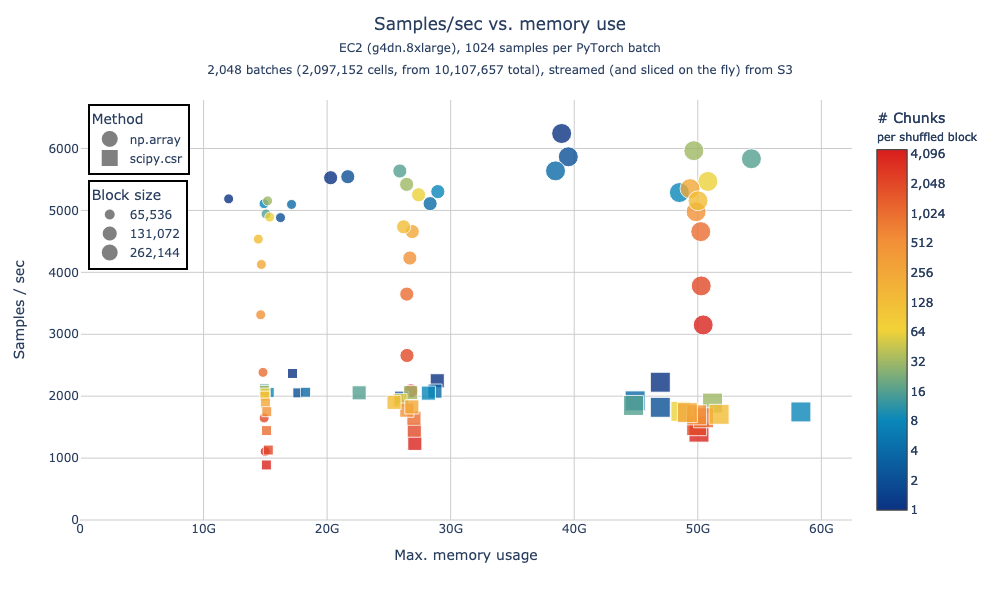

In [19]:
fig = go.Figure()

def dummy_trace(name, legend=None, **kwargs):
    marker = dict(color='gray')
    marker.update(kwargs)
    return go.Scatter(
        name=name,
        legend=legend,
        x=[None], y=[None], mode='markers',
        marker=marker,
    )

def legend(title, **kwargs):
    defaults = dict(
        xanchor='left',
        yanchor='top',
        bordercolor="Black",
        borderwidth=2,
        #bgcolor="rgba(0,0,0,0)",
    )
    defaults.update(kwargs)
    return dict(
        title_text=title,
        **defaults
    )

customdata_cols = [
    'chunk_size',
    'chunks_per_block',
    'block_size',
    'instance_type',
    'instance_id',
    'start_dt_str',
    'elapsed_str',
]
# Helper for customdata interpolation below
c = {
    col: "%%{customdata[%d]}" % idx
    for idx, col in enumerate(customdata_cols)
}

for idx, chunk_method in enumerate(CHUNK_METHODS):
    f = df[df.Method == chunk_method]
    symbol = symbols[idx]
    marker = dict(
        color=f.block_chunks_lg2,
        colorscale=px.colors.diverging.Portland,
        cmin=min_block_chunks_lg2,
        cmax=max_block_chunks_lg2 + .15,
        colorbar=colorbar,
        opacity=marker_opacity,
        showscale=True,
        size=f.marker_size,
        symbol=symbol,
    )

    fig.add_trace(go.Scatter(
        name=chunk_method,
        x=f[M],
        y=f[S],
        mode='markers',
        marker=marker,
        customdata=f[customdata_cols],
        showlegend=False,
    ))

    # Dummy traces, for legend: one per fmt, set color/size (instead of inheriting from last data point in `f`)
    size = marker_sizes[-1]
    fig.add_trace(dummy_trace(
        chunk_method,
        size=size,
        symbol=symbol,
    ))

# Dummy legend/traces for `block_size` facet (represented by marker size)
if len(marker_sizes) > 1:
    for block_size, marker_size in block2marker_size.items():
        fig.add_trace(dummy_trace(
            f"{block_size:,}",
            legend="legend2",
            size=marker_size,
            #symbol=symbols[0],
        ))

method_block_legends_v = dict(
    legend =legend('Method',     x=.01, y=.99, ),
    legend2=legend('Block size', x=.01, y=.81, ),
)
method_block_legends_h = dict(
    legend =legend('Method',     x=.145, y=.99, ),
    legend2=legend('Block size', x=.01,  y=.99, ),
)
if legend_orientation is None:
    legend_orientation = 'v'
method_block_legends = method_block_legends_v if legend_orientation == 'v' else method_block_legends_h

legends = method_block_legends

fig = plot(
    fig,
    utz.plots.title([
        title,
        host_subtitle,
        dataset_subtitle,
    ], subtitle_size="0.7em"),
    title_y=.95,
    name="speed_vs_mem_1",
    hovertemplate=[
        "%s (%s)" % (c['start_dt_str'], c['elapsed_str']),
        "%s (%s)" % (c['instance_id'], c['instance_type']),
        "%s: %s" % (C, c['chunk_size']),
        "Chunks per shuffled block: %s" % c['chunks_per_block'],
        "Shuffled block size: %s" % c['block_size'],
        "Samples/sec: %{y:,d}",
        "Memory: %{x:.3s}",
    ],
    xtitle=M,
    xaxis_tickformat='s',
    xaxis_rangemode='tozero',
    ytitle=S,
    **legends,
    zerolines='y',
)
fig
#from IPython.display import HTML
#HTML(fig.to_html(include_plotlyjs='cdn'))